In [1]:
import xarray as xr
import pathlib
from pathlib import Path
import numpy as np
# import pyvista as pv
import matplotlib.pyplot as plt
import h5netcdf
import h5py
import pickle
import cv2

In [2]:
xr.__version__

'0.16.2'

In [3]:
# make your root_dir the current working directory
root_dir = Path.cwd().parent.parent # set the root directory as a Pathlib path
print(root_dir)

folder_raw_data = root_dir / 'data/raw/' # raw data folder that holds the .zip .mat files for milling data

# make processed data directory if doesn't exist already
Path(root_dir / 'data/processed/').mkdir(parents=True, exist_ok=True)
folder_processed_data = root_dir / 'data/processed/'

/home/tim/Documents/earth-mantle-surrogate


In [4]:
data_path = folder_raw_data / 'spherical001.nc'

data = xr.open_dataset(data_path)
data                      # show all variables inside this dataset

<xarray.Dataset>
Dimensions:                                  (lat: 180, lon: 360, r: 201)
Coordinates:
  * lon                                      (lon) float64 0.0 1.003 ... 360.0
  * r                                        (r) float64 3.485e+03 ... 6.371e+03
  * lat                                      (lat) float64 90.0 89.49 ... -90.0
Data variables:
    temperature                              (lat, r, lon) float32 ...
    vx                                       (lat, r, lon) float32 ...
    vy                                       (lat, r, lon) float32 ...
    vz                                       (lat, r, lon) float32 ...
    thermal conductivity                     (lat, r, lon) float32 ...
    thermal expansivity                      (lat, r, lon) float32 ...
    temperature anomaly                      (lat, r, lon) float32 ...
    spin transition-induced density anomaly  (lat, r, lon) float32 ...

Let's look at how each data variable and coordinate is structured.

In [5]:
for c in list(data.coords):
    print(f'{c} shape:\t',np.shape(data[c]))

lon shape:	 (360,)
r shape:	 (201,)
lat shape:	 (180,)


In [6]:
for v in list(data.keys()):
    max_val = np.max(data[v].values)
    min_val =  np.min(data[v].values)
    shape_val = np.shape(data[v])
    print(f'{v:45} shape: {str(shape_val):} \tmax: {str(max_val):10s} \tmin: {min_val}' )

temperature                                   shape: (180, 201, 360) 	max: 3607.3438  	min: 293.0
vx                                            shape: (180, 201, 360) 	max: 5.700776e-09 	min: -3.9670631224453246e-09
vy                                            shape: (180, 201, 360) 	max: 5.82114e-09 	min: -4.824658006441496e-09
vz                                            shape: (180, 201, 360) 	max: 7.457673e-09 	min: -5.615409026660245e-09
thermal conductivity                          shape: (180, 201, 360) 	max: 0.5701583  	min: -0.7660495042800903
thermal expansivity                           shape: (180, 201, 360) 	max: 8.694364e-07 	min: -2.170390416722512e-06
temperature anomaly                           shape: (180, 201, 360) 	max: 1105.4534  	min: -1099.197509765625
spin transition-induced density anomaly       shape: (180, 201, 360) 	max: 130.17787  	min: -166.5840301513672


In [7]:
data.r.values

array([3485.  , 3492.25, 3506.75, 3521.26, 3535.76, 3550.26, 3564.76,
       3579.27, 3593.77, 3608.27, 3622.77, 3637.28, 3651.78, 3666.28,
       3680.78, 3695.29, 3709.79, 3724.29, 3738.79, 3753.3 , 3767.8 ,
       3782.3 , 3796.8 , 3811.31, 3825.81, 3840.31, 3854.81, 3869.32,
       3883.82, 3898.32, 3912.82, 3927.33, 3941.83, 3956.33, 3970.83,
       3985.34, 3999.84, 4014.34, 4028.84, 4043.35, 4057.85, 4072.35,
       4086.85, 4101.36, 4115.86, 4130.36, 4144.86, 4159.37, 4173.87,
       4188.37, 4202.87, 4217.38, 4231.88, 4246.38, 4260.88, 4275.39,
       4289.89, 4304.39, 4318.89, 4333.4 , 4347.9 , 4362.4 , 4376.9 ,
       4391.41, 4405.91, 4420.41, 4434.91, 4449.42, 4463.92, 4478.42,
       4492.92, 4507.43, 4521.93, 4536.43, 4550.93, 4565.44, 4579.94,
       4594.44, 4608.94, 4623.45, 4637.95, 4652.45, 4666.95, 4681.46,
       4695.96, 4710.46, 4724.96, 4739.47, 4753.97, 4768.47, 4782.97,
       4797.48, 4811.98, 4826.48, 4840.98, 4855.49, 4869.99, 4884.49,
       4898.99, 4913

In [8]:
np.diff(data.r.values, n=1)

array([ 7.25, 14.5 , 14.51, 14.5 , 14.5 , 14.5 , 14.51, 14.5 , 14.5 ,
       14.5 , 14.51, 14.5 , 14.5 , 14.5 , 14.51, 14.5 , 14.5 , 14.5 ,
       14.51, 14.5 , 14.5 , 14.5 , 14.51, 14.5 , 14.5 , 14.5 , 14.51,
       14.5 , 14.5 , 14.5 , 14.51, 14.5 , 14.5 , 14.5 , 14.51, 14.5 ,
       14.5 , 14.5 , 14.51, 14.5 , 14.5 , 14.5 , 14.51, 14.5 , 14.5 ,
       14.5 , 14.51, 14.5 , 14.5 , 14.5 , 14.51, 14.5 , 14.5 , 14.5 ,
       14.51, 14.5 , 14.5 , 14.5 , 14.51, 14.5 , 14.5 , 14.5 , 14.51,
       14.5 , 14.5 , 14.5 , 14.51, 14.5 , 14.5 , 14.5 , 14.51, 14.5 ,
       14.5 , 14.5 , 14.51, 14.5 , 14.5 , 14.5 , 14.51, 14.5 , 14.5 ,
       14.5 , 14.51, 14.5 , 14.5 , 14.5 , 14.51, 14.5 , 14.5 , 14.5 ,
       14.51, 14.5 , 14.5 , 14.5 , 14.51, 14.5 , 14.5 , 14.5 , 14.51,
       14.5 , 14.5 , 14.51, 14.5 , 14.5 , 14.5 , 14.51, 14.5 , 14.5 ,
       14.5 , 14.51, 14.5 , 14.5 , 14.5 , 14.51, 14.5 , 14.5 , 14.5 ,
       14.51, 14.5 , 14.5 , 14.5 , 14.51, 14.5 , 14.5 , 14.5 , 14.51,
       14.5 , 14.5 ,

In [9]:
data['temperature'].values.shape

(180, 201, 360)

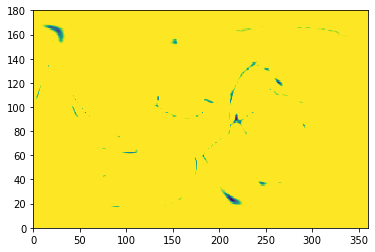

In [10]:
r_index = 199
var_to_plot = 'thermal expansivity'

# for i, var_name in enumerate(var_list):
#     if var_name == var_to_plot:
#         temp_array = data[var_to_plot].values[i,r_index,:,:]

plt.pcolormesh(data[var_to_plot].values[:,r_index,:])
plt.show()

# print(np.max(temp_array), np.min(temp_array))

# Functions

In [11]:

def scaler(x, min_val_array, max_val_array):
    """scaler data between 0 and 1"""
    # get the shape of the array
    # s = no. samples (should be just 1)
    # h = height (latitude)
    # r = radius
    # w = width (longitude)
    # v = no. variables (channels)
    # shape of x should be [s, v, r, h, w]
    s, v, r, h, w = np.shape(x)
    
    for radius in range(r):
        for var in range(v):
            x[0,var,radius,:,:] = np.divide((x[0,var,radius,:,:] - min_val_array[var]), np.abs(max_val_array[var] - min_val_array[var]))
           
    return x

# min-max function
def min_max_array(x):
    # get the min/max value for each variable
    min_vals = np.array([np.min(x[0,i,:,:,:]) for i in range(np.shape(x)[1])])
    max_vals = np.array([np.max(x[0,i,:,:,:]) for i in range(np.shape(x)[1])])
    return min_vals, max_vals

def load_data(data_path : pathlib.PosixPath):
    
    data = xr.open_dataset(data_path,)

    # create a list of all the variables.
    var_list = list(data.keys())
    
    radial_array = data.r.values

    # stack all the variables together, about the last dimension
    x = np.stack([data[var_name].values for var_name in var_list], axis=-1)

    # move height (latitudes) before width (longitudes)
    # final output will have shape [no_samples, no_variables, radial_index, latitude, longitude]
    return np.expand_dims(np.moveaxis(x, source=[3, 0], destination=[0,2]),0), var_list, radial_array


def downscale(x, downscale_percent, cv2_interp=cv2.INTER_CUBIC):
    # shape of x should be [s, v, r, h, w]
    # only downsample if downscale_percent < 1
    h = x.shape[3]
    w = x.shape[4]
    
    if downscale_percent != 1:
        # downscale data
        width = int(w * downscale_percent)
        height = int(h * downscale_percent)
        dim = (width, height)
        data_list = []
        
        # iterate through each variable
        for var_index in range(x.shape[1]):
            temp_list = []
            # iterate trhough each radius
            for radius_index in range(x[0,var_index,:,:,:].shape[0]):
                temp_list.append(cv2.resize(x[0,var_index,radius_index,:,:], dim, interpolation=cv2_interp))

            temp_array = np.stack(temp_list, axis=0)
            data_list.append(temp_array)

        # stack data_list into a np array
        return np.expand_dims(np.stack(data_list, axis=0,),0)
    else:
        return x


def shrink_scale_data(x, downscale_percent = 0.50, cv2_interp=cv2.INTER_AREA, save_hdf5=False, 
                       save_name='data_scaled_array_50percent_01.hdf5', 
                       scale_data=False, min_val=None, max_val=None):
    
    # downscale data
    x = downscale(x, downscale_percent, cv2_interp)
    
    # scale data if scale_data=True
    # if don't have min_val, max_val already provided then
    # we will scale the array based on the min/max in x
    if min_val == None and scale_data:
        # get min-max
        min_vals, max_vals = min_max_array(x)

        # scale x
        x = scaler(x, min_vals, max_vals)

    # save hdf5 is marked as True
    if save_hdf5:
        with h5py.File(save_name, "w") as f:
            dset = f.create_dataset("x", data=x)
            
        # save var_list as a pickle
        with open('var_list.pkl', 'wb') as f:
            pickle.dump(var_list, f)
    
    return x

In [12]:
data_path = folder_raw_data / 'spherical001.nc'

x, var_list, radial_array = load_data(data_path,)
x.shape

(1, 8, 201, 180, 360)

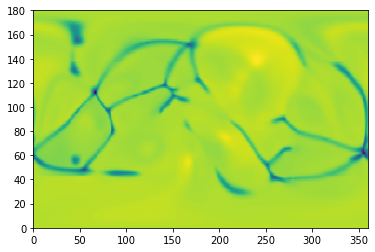

8.717817e-08 -4.961358e-07


In [13]:
r_index = 16
var_to_plot = 'thermal expansivity'

for i, var_name in enumerate(var_list):
    if var_name == var_to_plot:
        temp_array = x[0,i,r_index,:,:]

plt.pcolormesh(temp_array)
plt.show()

print(np.max(temp_array), np.min(temp_array))

In the "[AI-assisted superresolution cosmological simulations](https://www.pnas.org/content/118/19/e2022038118)" paper they have high-resolution (HR) and low-resolution (LR) 3D data. They use the LR data to create super-resolution (SR), which has the same dimension as HR data.

From their paper:
* At each mini-batch, LR is cropped to a $14^3$ volume. Three cells are padded on each side to get a $20^3$ size input
* Output from generator is $118^3$, but the inner portion is cropped to match the corresponding $(8 \times 14)^3$ input, which corresponds to a SR size of $112^3$

$112/8 = 14$ ... therefore, if our `x` lat/long dimensions are 90x180, we have to downscale the `x` data by 8x, or the original data by 16x.

However, the 90x180, downscaled by 8, does make dimensions of whole numbers (e.g. it'd be 11.25x22.5). Therefore, **we need to expand the dimensions**.

We can "roll" the data about the north-south axis to "pad" the data on the longitudinal axis. We can mirror the data on the top/bottom to "pad" the data on the latitudinal axis. Here are the functions for this.


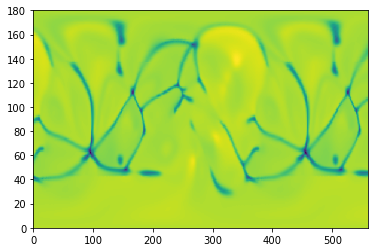

In [14]:
# load data
x, var_list, radial_array = load_data(data_path,)

# concatenate along sides
# make it a very large number so it's obvious
pad_lon = 100

if pad_lon > 0:
    x = np.concatenate((x[:,:,:,:,-pad_lon:], x, x[:,:,:,:,:pad_lon]), axis=-1)
    
r_index = 16
var_to_plot = 'thermal expansivity'

for i, var_name in enumerate(var_list):
    if var_name == var_to_plot:
        temp_array = x[0,i,r_index,:,:]

plt.pcolormesh(temp_array)
plt.show()

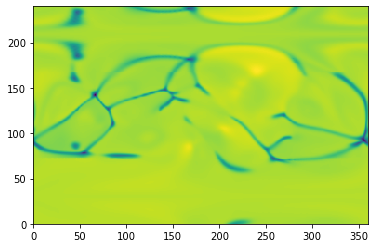

In [15]:
# load data
x, var_list, radial_array = load_data(data_path,)

# mirror top and bottom rows (make large so its dead obvious)
# we don't want to double the top/bottom row, so we only select n-1 row
pad_lat = 30

if pad_lat > 0:
    x = np.concatenate((np.flip(x, [3])[:,:,:,-pad_lat-1:-1,:], # mirror array and select top rows
                         x, 
                         np.flip(x, [3])[:,:,:,1:pad_lat+1,:]), # mirror array and select bottom rows
                  axis=-2) # append along longitudinal (left-right) axis
    
r_index = 16
var_to_plot = 'thermal expansivity'

for i, var_name in enumerate(var_list):
    if var_name == var_to_plot:
        temp_array = x[0,i,r_index,:,:]

plt.pcolormesh(temp_array)
plt.show()

We'll turn these into a function.

In [16]:
def pad_data(x, pad_top_bot=0, pad_sides=0):
    """pad the x data along on the sides
    
    Parameters
    ===========
    x : numpy array
        Earth mantle array
    
    pad_top_bot : int
        Pad amount on the top and bottom (along latitudinal axis)
        
    pad_sides : int
        Pad amount on the sides (along longitudinal axis)

    Returns
    ===========
    x : numpy array
        Numpy array with height increased by 2*pad_top_bot
        and width increased by 2*pad_sides
    """

    if pad_sides > 0:
        x = np.concatenate((x[:,:,:,:,-pad_sides:], x, x[:,:,:,:,:pad_sides]), axis=-1)
    
    if pad_top_bot > 0:
        x = np.concatenate((np.flip(x, [3])[:,:,:,-pad_top_bot:,:], # mirror array and select top rows
                         x, 
                         np.flip(x, [3])[:,:,:,:pad_top_bot,:]), # mirror array and select bottom rows
                      axis=-2) # append along longitudinal (left-right) axis
        
    return x

In [17]:
# load data
x, var_list, radial_array = load_data(data_path,)
print('original x.shape:', x.shape)

x = pad_data(x, pad_top_bot=5, pad_sides=5)

print('padded x.shape:', x.shape)

original x.shape: (1, 8, 201, 180, 360)
padded x.shape: (1, 8, 201, 190, 370)


Want our LR, when "padded", to be $20^3$, as same in Li et al. To get to that, we pad the top and bottom by 35 each. 

Don't need to pad sides.

When the "volume" comes out of the generator we will crop the SR volume to match the HR volume (118^3 --> corresponds to 

In [18]:
# drop r_index 0, 200
r_index_array = np.arange(0, len(radial_array))[1:-1]
r_index_array

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [19]:
r_index_to_keep = r_index_array[::10]
r_index_to_keep

array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191])

In [20]:
data_path = folder_raw_data / 'spherical001.nc'

x, var_list, radial_array = load_data(data_path,)


In [21]:
x.shape

(1, 8, 201, 180, 360)

In [22]:
var_list

['temperature',
 'vx',
 'vy',
 'vz',
 'thermal conductivity',
 'thermal expansivity',
 'temperature anomaly',
 'spin transition-induced density anomaly']

In [23]:
def keep_variables(x, original_var_list, var_list_to_keep):
    var_index_list = []
    for i, v in enumerate(original_var_list):
        if v in var_list_to_keep:
            var_index_list.append(i)
    return x[:,np.array(var_index_list),:,:,:]

In [24]:
x = keep_variables(x, var_list, var_list[0:4])

In [25]:
x.shape

(1, 4, 201, 180, 360)

In [26]:
x = x[:,:,r_index_to_keep,:,:]

In [27]:
x.shape

(1, 4, 20, 180, 360)

In [28]:
def crop_x_data(x, crop_width=1, crop_height=1):
    "symetrically crop array"
    w = crop_width
    h = crop_height
    
    if crop_width == 0 and crop_height == 0:
        return x
    elif crop_width == 0:
        return x[:,:,:,h:-h,:]
    elif crop_height == 0:
        return x[:,:,:,:,w:-w]
    else:
        return x[:,:,:,h:-h,w:-w]

Put it all together, and save the outputs.

* **Input to Generator:** LR input shape should be `(1, 4, 198, 18, 28)`.
* **Output from Generator:** Reconstruction shape from generator is `(1, 4, 198, 102, 182)`.

In [29]:
## data_path = folder_raw_data / 'spherical001.nc'

# load the data
# original shape of x is (1, 8, 201, 180, 360)
x_orig, var_list, radial_array = load_data(data_path,)

# select only the first 4 variables.
# ['temperature','vx','vy','vz']
var_list_to_keep = var_list[0:4]
x_orig = keep_variables(x_orig, var_list, var_list_to_keep)

# drop r_index 0,1, 200
# index 0 and 200 are corrupt
# index 1 is dropped to get final radial dim to 198
r_index_array = np.arange(0, len(radial_array))[2:-1]
x_orig = x_orig[:,:,r_index_array,:,:].copy()
print(f'x_orig before downscale: \t\t\t {str(x_orig.shape):10}')

# save r_index_to_keep and var_list  as a pickle
with open('r_index_full.pkl', 'wb') as f:
    pickle.dump(r_index_array, f)

with open('var_list.pkl', 'wb') as f:
    pickle.dump(var_list_to_keep, f)
    
# downscale the full sized by 50%
# dimension of downscaled is (1, 8, 201, 90, 180)
# also scale the data between 0 and 1
x = shrink_scale_data(x_orig, downscale_percent=0.60, scale_data=True, save_hdf5=True, save_name='x_orig_01.hdf5')
x_orig = x # for plotting
print(f'x orig before pad: \t {str(x.shape):10}')

np.save('x_orig_01.npy', x)


# pad the x such that it can be downscaled without rounding
# any dimension (e.g. 90/8=11.25 <-- not whole number. Pad by 3 on top/bot
# to get 96/8=12.0). The final (minimum) dimension of x is (1, 4, 198, 12, 24).
# however, we want the input to the generator needs a height of 18 to create an output
# that is 102. Therefore need to pad the top/bot by 27 each
x = pad_data(x, pad_top_bot=2, pad_sides=0)
print(f'x orig after pad: \t {str(x.shape):10}')
x = shrink_scale_data(x, downscale_percent=1/8.0, scale_data=True, save_hdf5=False,cv2_interp=cv2.INTER_AREA)
print(f'x input: \t\t\t {str(x.shape):10}')

# x is saved
with h5py.File('x_01.hdf5', "w") as f:
    dset = f.create_dataset("x", data=x)
    
np.save('x_01.npy', x)

x_orig before downscale: 			 (1, 4, 198, 180, 360)
x orig before pad: 	 (1, 4, 198, 108, 216)
x orig after pad: 	 (1, 4, 198, 112, 216)
x input: 			 (1, 4, 198, 14, 27)


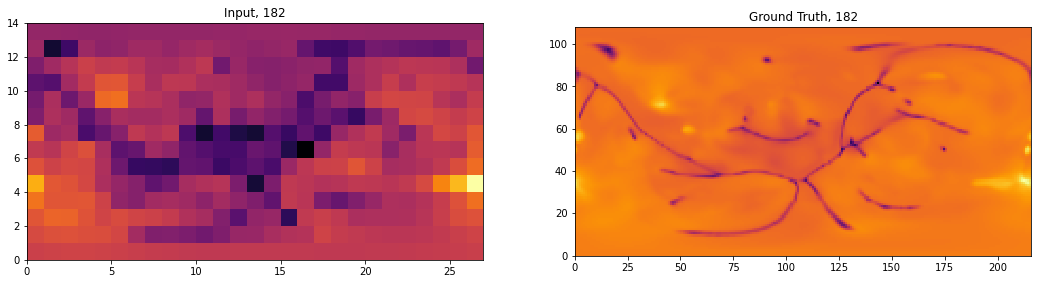

In [30]:
title_list = ['Input','Ground Truth']
r_index = 182
var_to_plot = 'temperature'


# create image
color_scheme='inferno'
fig, axes = plt.subplots(1,2, figsize=(18,8))

for ax, title in zip(axes.flat, title_list):
    
                
    # downscaled data
    if title == 'Input':
        for i, var_name in enumerate(var_list):
            if var_name == var_to_plot:
                                
                ax.pcolormesh(x[0,i,r_index,:,:], cmap=color_scheme)
                ax.set_title(f"{title}, {r_index}")
                ax.set_aspect(1)
                
            
    # original data
    if title == 'Ground Truth':
        for i, var_name in enumerate(var_list):
            if var_name == var_to_plot:
                
                ax.pcolormesh(x_orig[0,i,r_index,:,:], cmap=color_scheme)
                ax.set_title(f"{title}, {r_index}")
                ax.set_aspect(1)

plt.show()

In [63]:
def pad_data(x, pad_top_bot=0, pad_sides=0):
    """pad the x data along on the sides
    
    Parameters
    ===========
    x : numpy array
        Earth mantle array
    
    pad_top_bot : int
        Pad amount on the top and bottom (along latitudinal axis)
        
    pad_sides : int
        Pad amount on the sides (along longitudinal axis)

    Returns
    ===========
    x : numpy array
        Numpy array with height increased by 2*pad_top_bot
        and width increased by 2*pad_sides
    """

    if pad_sides > 0:
        x = np.concatenate((x[:,:,:,:,-pad_sides:], x, x[:,:,:,:,:pad_sides]), axis=-1)
    
    if pad_top_bot > 0:
        x = np.concatenate((np.flip(x, [3])[:,:,:,-pad_top_bot:,:], # mirror array and select top rows
                         x, 
                         np.flip(x, [3])[:,:,:,:pad_top_bot,:]), # mirror array and select bottom rows
                      axis=-2) # append along longitudinal (left-right) axis
        
    return x

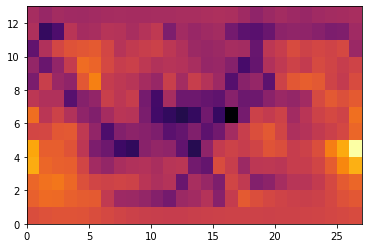

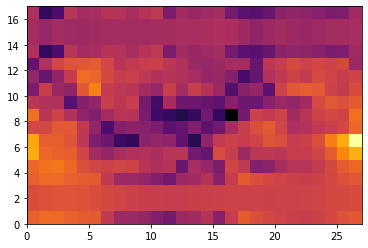

In [67]:
x_temp = pad_data(x, pad_top_bot=2)
plt.pcolormesh(x[0,0,182,:,:], cmap=color_scheme)
plt.show()
plt.pcolormesh(x_temp[0,0,182,:,:], cmap=color_scheme)
plt.show()

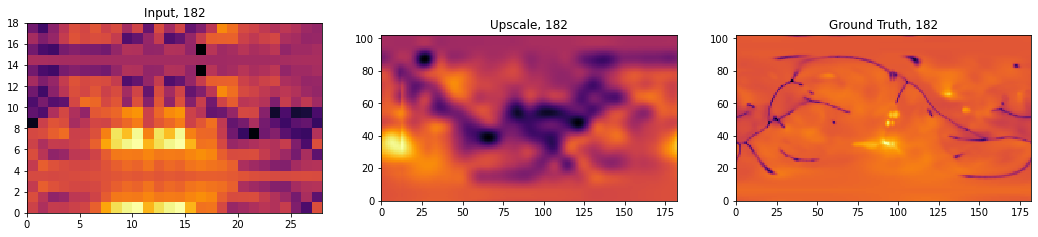

In [142]:
# try roll
title_list = ['Input', "Upscale", 'Ground Truth']
r_index = 182
var_to_plot = 'temperature'

roll_n = 12 # how much to roll input data


# create image
color_scheme='inferno'
fig, axes = plt.subplots(1,3, figsize=(18,8))

for ax, title in zip(axes.flat, title_list):
    
                
    # downscaled data
    if title == 'Input':
        for i, var_name in enumerate(var_list):
            if var_name == var_to_plot:
                                
                ax.pcolormesh(np.roll(x_input[0,i,r_index,:,:],roll_n,1), cmap=color_scheme)
                ax.set_title(f"{title}, {r_index}")
                ax.set_aspect(1)
                
    # downscaled data
    if title == 'Upscale':
        for i, var_name in enumerate(var_list):
            if var_name == var_to_plot:
                
                ax.pcolormesh(np.roll(x_up[0,i,r_index,:,:],roll_n, 1), cmap=color_scheme)
                ax.set_title(f"{title}, {r_index}")
                ax.set_aspect(1)
            
    # original data
    if title == 'Ground Truth':
        for i, var_name in enumerate(var_list):
            if var_name == var_to_plot:
                
                ax.pcolormesh(np.roll(x_full[0,i,r_index,:,:],roll_n*8,1), cmap=color_scheme)
                ax.set_title(f"{title}, {r_index}")
                ax.set_aspect(1)

plt.show()